<h1> Prediction Ford Car Price Using Model Machine Learning Linear Regression<h1>

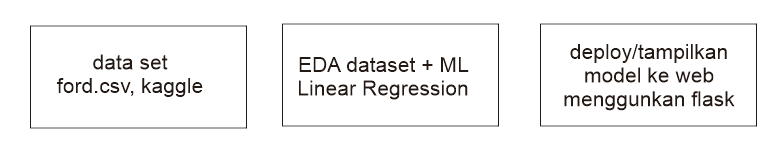

# import library and dataset

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot




In [18]:
data = pd.read_csv("https://raw.githubusercontent.com/Faiqazmi/Dataset_latihan/main/ford.csv")
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


#  Exploratory data analysis

In [19]:
#data summary for price atribut 

data.price.describe()

count    17965.000000
mean     12279.756415
std       4741.382606
min        495.000000
25%       8999.000000
50%      11291.000000
75%      15299.000000
max      54995.000000
Name: price, dtype: float64

In [20]:
data.shape

(17965, 9)

In [21]:
# sort start from 10 high price
dt = data.sort_values('year', ascending=True).head(10)
dt

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16878,Escort,1996,3000,Manual,50000,Petrol,265,34.4,1.8
13544,Fiesta,1998,2699,Manual,37000,Petrol,160,41.5,1.2
17282,Fiesta,2000,1995,Manual,43000,Petrol,160,41.5,1.3
16899,Puma,2002,2195,Manual,108000,Petrol,230,38.2,1.7
16900,Puma,2002,2695,Manual,69000,Petrol,220,38.7,1.6
14367,Mondeo,2002,895,Manual,136784,Petrol,300,36.2,1.8
16819,Focus,2003,3999,Manual,56064,Petrol,325,31.0,2.0
16970,Focus,2003,1695,Manual,89630,Petrol,200,40.9,1.6
17103,Focus,2003,495,Manual,177644,Petrol,200,41.5,1.6
16976,Fiesta,2004,2295,Manual,88936,Petrol,200,44.1,1.4


In [22]:
data = data.drop(index=[17726,16878,13544])

In [23]:
data['total'] =""
tbl_seg_cat = data.groupby(['year',"transmission"]).agg({'price':'sum'})
tbl_seg_cat = tbl_seg_cat.reset_index()
tbl_seg_cat.head(10)

,year,transmission,price
0,2000,Manual,1995
1,2002,Manual,5785
2,2003,Manual,6189
3,2004,Automatic,1500
4,2004,Manual,4244
5,2005,Automatic,3970
6,2005,Manual,21518
7,2006,Automatic,2495
8,2006,Manual,26139
9,2007,Automatic,5694


In [24]:
tbl_seg_cat['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [25]:
data_01= go.Scatter(
          x= tbl_seg_cat[tbl_seg_cat.transmission== "Manual"].year,
          y= tbl_seg_cat[tbl_seg_cat.transmission== "Manual"].price, name= "Manual",
          mode="lines+markers" 
       )
   
data_02= go.Scatter(
          x= tbl_seg_cat[tbl_seg_cat.transmission== "Automatic"].year,
          y= tbl_seg_cat[tbl_seg_cat.transmission== "Automatic"].price, name= "Automotic",
          mode="lines+markers" 
       )

data_03= go.Scatter(
          x= tbl_seg_cat[tbl_seg_cat.transmission== "Semi-Auto"].year,
          y= tbl_seg_cat[tbl_seg_cat.transmission== "Semi-Auto"].price, name= "Semi-Auto",
          mode="lines+markers" 
       )

In [26]:
datas = [data_01,data_02,data_03]

In [27]:
fig = go.Figure(data=datas, layout_title_text="Perbandingan jumlah angka bunuh diri pertahun bedasarkan Gender ( Informatif)")
iplot(fig)

In [28]:
mk =data[data.model == 'Fiesta'].year
mk.value_counts()

Series([], Name: year, dtype: int64)

In [29]:


fig = go.Figure()
fig = px.line(data, x='year', y="price")
fig.show()

In [30]:
# sort start from 10 low price
data.sort_values('price', ascending=False).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,total
11912,Focus,2018,54995,Manual,11000,Petrol,145,36.7,2.3,
11913,Mustang,2017,49999,Manual,21575,Petrol,145,20.9,5.0,
11910,Mustang,2017,48999,Automatic,7546,Petrol,145,23.5,5.0,
17866,Mustang,2020,48000,Manual,50,Petrol,145,23.9,5.0,
12613,Mustang,2019,45250,Automatic,2500,Petrol,145,22.1,5.0,
10901,Mustang,2020,42999,Manual,10,Petrol,145,23.7,5.0,
12996,Mustang,2019,42500,Automatic,226,Petrol,145,22.1,5.0,
302,Mustang,2020,42489,Automatic,3500,Petrol,145,22.1,5.0,
13431,Mustang,2019,42000,Semi-Auto,756,Petrol,150,22.6,5.0,
12600,Mustang,2020,41000,Manual,100,Petrol,145,22.8,5.0,


In [31]:
# other model
data['model'].value_counts()

 Fiesta                   6555
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Transit Tourneo             1
 Ranger                      1
Name: model, dtype: int64

cek dimensi dataset ? terdapat 10668 baris dan 9 kolom

In [32]:
data.shape

(17962, 10)

cek missing value, cek tipe data, dan cek atribut-atribut

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17962 entries, 0 to 17964
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17962 non-null  object 
 1   year          17962 non-null  int64  
 2   price         17962 non-null  int64  
 3   transmission  17962 non-null  object 
 4   mileage       17962 non-null  int64  
 5   fuelType      17962 non-null  object 
 6   tax           17962 non-null  int64  
 7   mpg           17962 non-null  float64
 8   engineSize    17962 non-null  float64
 9   total         17962 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.5+ MB


In [34]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
total           0
dtype: int64

melihat ada berapa versi mobil audi 

In [35]:
data.groupby('year')['price','mileage','tax'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,price,mileage,tax
year,,,
2000,1995,43000,160
2002,5785,313784,750
2003,6189,323338,725
2004,5744,333236,720
2005,25488,1394611,3425
2006,28634,1103466,2355
2007,83314,2690467,6680
2008,148137,4719652,10965
2009,338495,6820286,14840


In [36]:
data['model'].value_counts().count()

22

In [37]:
data['mpg'].value_counts()

65.7    2528
54.3    1774
60.1    1674
64.2     995
57.7     961
        ... 
37.1       1
28.0       1
32.1       1
69.0       1
23.7       1
Name: mpg, Length: 90, dtype: int64

In [38]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17962.000000,17962.000000,17962.000000,17962.000000,17962.000000,17962.000000
mean,2016.866385,12281.128493,23359.637847,113.318394,57.910055,1.350807
std,2.014193,4740.537299,19471.046822,62.000538,10.123936,0.432393
min,2000.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18241.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31042.000000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


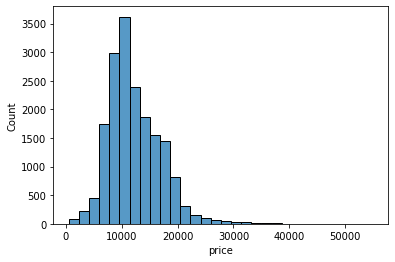

In [39]:
sns.histplot(data['price'], bins=30)

- price/harga dengan rata - rata paling banyak di jual di pasaran US yaitu terdapat pada mobil dengan harga 10000 

In [40]:
def plot_numerical(feature):
    ax = sns.lmplot(x=feature, y='price', data=data)
    ax.set_xticklabels(rotation=85)
    plt.show()
    
def plot_categorical(feature, figsize=None):
    df = data.groupby([feature])['price'].describe()[['mean', '50%', 'min', 'count']]

    labels = df.index.values
    x = np.arange(len(labels))
    width = 0.9
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # plot bars for min, median and mean cars price
    rects1 = ax1.bar(x-width/2, df['50%'], width/3, label='median')
    rects2 = ax1.bar(x-width/6, df['mean'], width/3, label='mean')
    rects3 = ax1.bar(x+width/6, df['min'], width/3, label='min')

    ax1.set_ylabel('price', fontsize=15)
    ax1.set_title(feature, fontsize=18)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, rotation=85)
    ax1.legend()

    # plot counts of data points
    ax2 = ax1.twinx()
    ax2.set_ylabel('Counts', fontsize=15)
    ax2.plot(x-width/2, df['count'], color='red', linestyle='dashed')

    # annotate counts of data points
    for i, rect in enumerate(rects2):
        height = int(round(rect.get_height()))
        ax1.annotate('{}'.format(int(df['count'].iloc[i])),
                     xy=(rect.get_x() + rect.get_width()/2, height),
                     xytext=(0, 3), textcoords="offset points",
                     ha='center', va='bottom', color='red')
    plt.show()

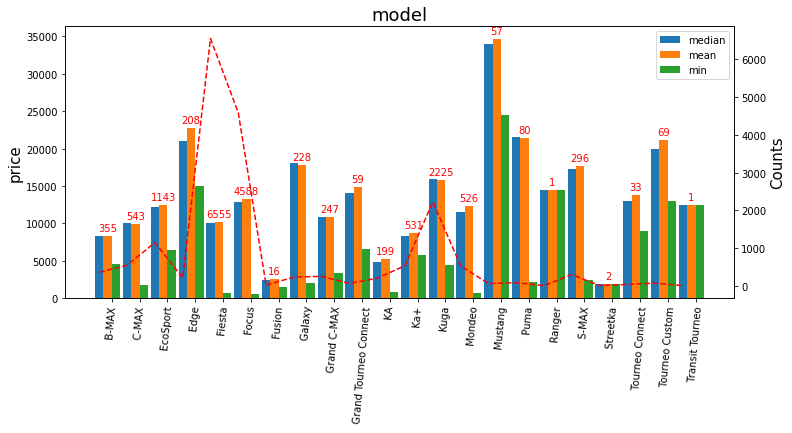

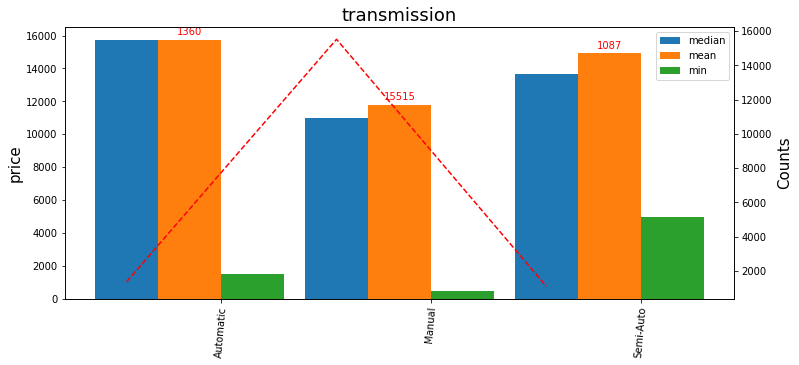

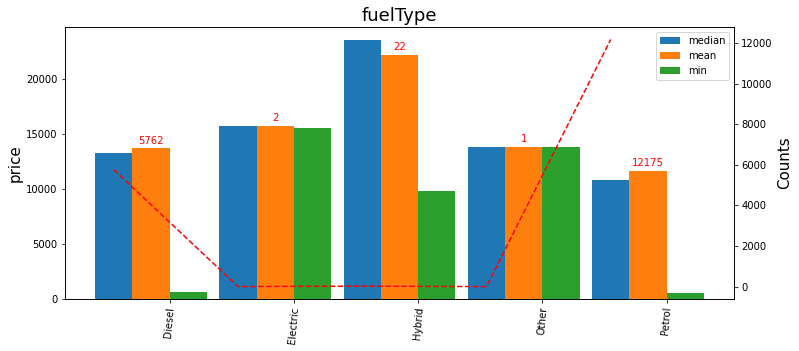

In [41]:
for feature in ['model','transmission', 'fuelType']:
    plot_categorical(feature)

# Analysis and Data Prerocessing

In [42]:
from sklearn import preprocessing

encode = preprocessing.LabelEncoder()

encode.fit(data.transmission.drop_duplicates())
data.transmission = encode.transform(data.transmission)

encode.fit(data.fuelType.drop_duplicates())
data.fuelType = encode.transform(data.fuelType)

encode.fit(data.model.drop_duplicates())
data.model = encode.transform(data.model)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17962 entries, 0 to 17964
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17962 non-null  int64  
 1   year          17962 non-null  int64  
 2   price         17962 non-null  int64  
 3   transmission  17962 non-null  int64  
 4   mileage       17962 non-null  int64  
 5   fuelType      17962 non-null  int64  
 6   tax           17962 non-null  int64  
 7   mpg           17962 non-null  float64
 8   engineSize    17962 non-null  float64
 9   total         17962 non-null  object 
dtypes: float64(2), int64(7), object(1)
memory usage: 1.5+ MB


In [44]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,total
0,4,2017,12000,0,15944,4,150,57.7,1.0,
1,5,2018,14000,1,9083,4,150,57.7,1.0,
2,5,2017,13000,1,12456,4,150,57.7,1.0,
3,4,2019,17500,1,10460,4,145,40.3,1.5,
4,4,2019,16500,0,1482,4,145,48.7,1.0,
...,...,...,...,...,...,...,...,...,...,...
17960,4,2016,7999,1,31348,4,125,54.3,1.2,
17961,0,2017,8999,1,16700,4,150,47.1,1.4,
17962,0,2014,7499,1,40700,4,30,57.7,1.0,
17963,5,2015,9999,1,7010,0,20,67.3,1.6,


In [45]:
data.corr()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,1.000000,0.031311,0.326878,-0.061990,0.079549,-0.405771,0.192658,-0.242474,0.516905
year,0.031311,1.000000,0.646905,-0.014202,-0.721536,0.089518,0.303953,-0.023795,-0.139558
price,0.326878,0.646905,1.000000,-0.058232,-0.530601,-0.202691,0.407478,-0.347154,0.411359
transmission,-0.061990,-0.014202,-0.058232,1.000000,0.016892,-0.005020,-0.053116,0.055898,-0.026476
mileage,0.079549,-0.721536,-0.530601,0.016892,1.000000,-0.257718,-0.260999,0.120502,0.214963
fuelType,-0.405771,0.089518,-0.202691,-0.005020,-0.257718,1.000000,0.129509,-0.297688,-0.644687
tax,0.192658,0.303953,0.407478,-0.053116,-0.260999,0.129509,1.000000,-0.502771,0.184226
mpg,-0.242474,-0.023795,-0.347154,0.055898,0.120502,-0.297688,-0.502771,1.000000,-0.260498
engineSize,0.516905,-0.139558,0.411359,-0.026476,0.214963,-0.644687,0.184226,-0.260498,1.000000


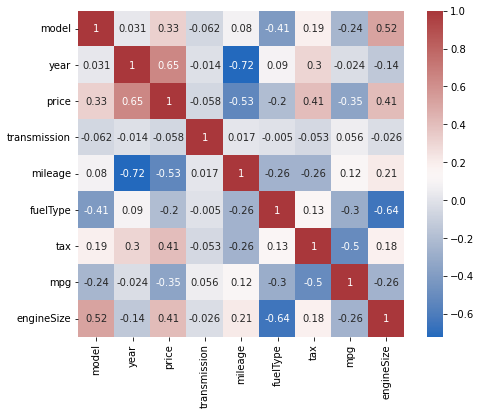

In [46]:
plt.figure(figsize = (8,6))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap = 'vlag', square = True, annot = True)

Corelasi :
- (+) = (year,price),(price,tax),(price,engine), (modelxprice)
- (-) = milage, mpg
- tidak ada korelasi = transsmision,fulltype


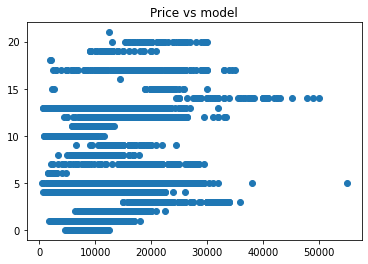

In [47]:
plt.scatter(x= "price", y="model", data=data)
plt.title("Price vs model")
plt.show()

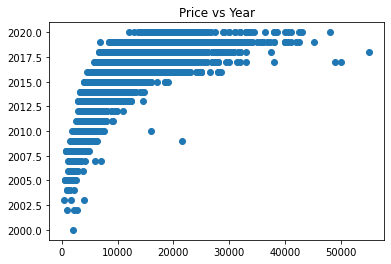

In [48]:
plt.scatter(x= "price", y="year", data=data)
plt.title("Price vs Year")
plt.show()

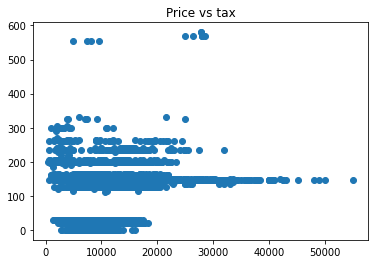

In [49]:
plt.scatter(x= "price", y="tax", data=data)
plt.title("Price vs tax")
plt.show()

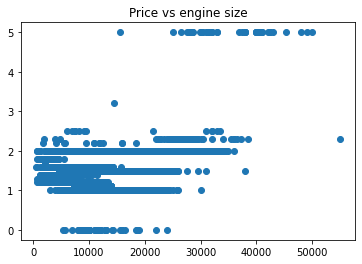

In [50]:
plt.scatter(x= "price", y="engineSize", data=data)
plt.title("Price vs engine size")
plt.show()

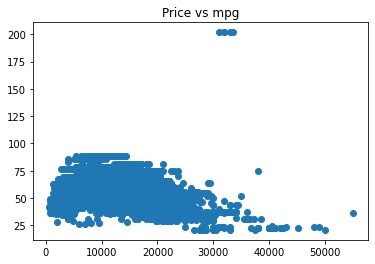

In [51]:
plt.scatter(x= "price", y="mpg", data=data)
plt.title("Price vs mpg")
plt.show()

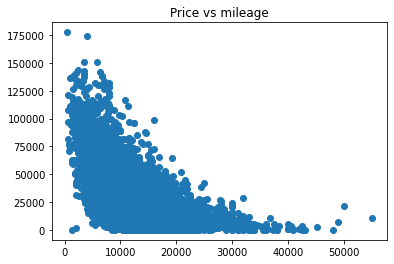

In [52]:
plt.scatter(x= "price", y="mileage", data=data)
plt.title("Price vs mileage")
plt.show()

In [53]:
data1 = data.drop(columns=['fuelType','transmission'], inplace=True)
data1

In [54]:
data1 = data
data1

,model,year,price,mileage,tax,mpg,engineSize,total
0,4,2017,12000,15944,150,57.7,1.0,
1,5,2018,14000,9083,150,57.7,1.0,
2,5,2017,13000,12456,150,57.7,1.0,
3,4,2019,17500,10460,145,40.3,1.5,
4,4,2019,16500,1482,145,48.7,1.0,
...,...,...,...,...,...,...,...,...
17960,4,2016,7999,31348,125,54.3,1.2,
17961,0,2017,8999,16700,150,47.1,1.4,
17962,0,2014,7499,40700,30,57.7,1.0,
17963,5,2015,9999,7010,20,67.3,1.6,


# Data Preprocessing

In [55]:
nw_data = data1[['model','year','mileage','tax','mpg','engineSize','price']]
nw_data

,model,year,mileage,tax,mpg,engineSize,price
0,4,2017,15944,150,57.7,1.0,12000
1,5,2018,9083,150,57.7,1.0,14000
2,5,2017,12456,150,57.7,1.0,13000
3,4,2019,10460,145,40.3,1.5,17500
4,4,2019,1482,145,48.7,1.0,16500
...,...,...,...,...,...,...,...
17960,4,2016,31348,125,54.3,1.2,7999
17961,0,2017,16700,150,47.1,1.4,8999
17962,0,2014,40700,30,57.7,1.0,7499
17963,5,2015,7010,20,67.3,1.6,9999


In [56]:
x = nw_data.iloc[:, 0:6]
y = nw_data.iloc[:, -1]

In [57]:
x

,model,year,mileage,tax,mpg,engineSize
0,4,2017,15944,150,57.7,1.0
1,5,2018,9083,150,57.7,1.0
2,5,2017,12456,150,57.7,1.0
3,4,2019,10460,145,40.3,1.5
4,4,2019,1482,145,48.7,1.0
...,...,...,...,...,...,...
17960,4,2016,31348,125,54.3,1.2
17961,0,2017,16700,150,47.1,1.4
17962,0,2014,40700,30,57.7,1.0
17963,5,2015,7010,20,67.3,1.6


In [58]:
y=pd.DataFrame(y)
y

,price
0,12000
1,14000
2,13000
3,17500
4,16500
...,...
17960,7999
17961,8999
17962,7499
17963,9999


# Building Model and Result Model

In [59]:
# percobaan 1
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 0)

print("=======================percobaan 1=======================")
print("Data train x :",xTrain.shape," Data Test x: ", xTest.shape)
print("Data Train y: ",yTrain.shape," Data Test y: ", yTest.shape)
print(" ")


=======================percobaan 1=======================
Data train x : (14369, 6)  Data Test x:  (3593, 6)
Data Train y:  (14369, 1)  Data Test y:  (3593, 1)
 


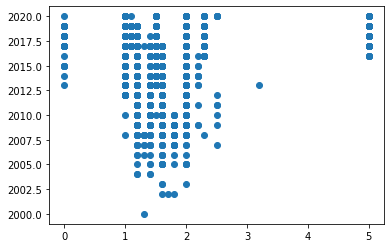

In [60]:
# data was will train
plt.scatter(xTrain.iloc[:,5], xTrain.iloc[:, 1], cmap='winter')

In [61]:
# model linear regression

from sklearn import linear_model
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(xTrain, yTrain)


LinearRegression()

In [62]:
# score model linear regression
pred = lr.predict(xTest)
print('Linear Regression Score: ', lr.score(xTest,yTest))

Linear Regression Score:  0.7465572014459334


In [63]:
print("intercept : ", lr.intercept_)
print("Slop/Koefesien : ",lr.coef_)

intercept :  [-2557511.6470411]
Slop/Koefesien :  [[ 5.03560906e+01  1.27341182e+03 -5.41325567e-02  6.50508673e-01
  -7.74852211e+01  5.08816310e+03]]


In [64]:
print(pred)

[[ 9818.33991152]
 [ 9131.98327954]
 [12770.70300305]
 ...
 [11955.60466586]
 [15395.47070266]
 [12903.26479499]]


In [65]:
print(pred.round(decimals=-1))

[[ 9820.]
 [ 9130.]
 [12770.]
 ...
 [11960.]
 [15400.]
 [12900.]]


In [66]:
dat= pd.DataFrame(pred)
dat.replace

<bound method DataFrame.replace of                  0
0      9818.339912
1      9131.983280
2     12770.703003
3     10460.602265
4      9109.670983
...            ...
3588  16632.134047
3589  10621.229466
3590  11955.604666
3591  15395.470703
3592  12903.264795

[3593 rows x 1 columns]>

# Validasi Model

In [67]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [68]:
X = nw_data[['model','year','mileage','tax','mpg','engineSize']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(nw_data['price'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     8423.
Date:                Sun, 26 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:40:10   Log-Likelihood:            -1.6549e+05
No. Observations:               17962   AIC:                         3.310e+05
Df Residuals:                   17955   BIC:                         3.310e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.602e+06   2.74e+04    -94.810      0.0

In [69]:
nw_data['car_price_pred'] = olsmod.predict(X)
nw_data['residual'] = olsmod.resid
nw_data.head()

,model,year,mileage,tax,mpg,engineSize,price,car_price_pred,residual
0,4,2017,15944,150,57.7,1.0,12000,10967.141025,1032.858975
1,5,2018,9083,150,57.7,1.0,14000,12675.529703,1324.470297
2,5,2017,12456,150,57.7,1.0,13000,11202.885638,1797.114362
3,4,2019,10460,145,40.3,1.5,17500,17831.502590,-331.502590
4,4,2019,1482,145,48.7,1.0,16500,15056.042432,1443.957568


# Assumption Test

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



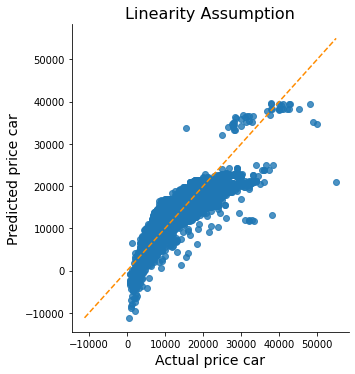

In [70]:
# Uji Linearitas

# Plotting the observed vs predicted values
sns.lmplot(x='price', y='car_price_pred', data=nw_data, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(nw_data[['price', 'car_price_pred']].min().min()-10, 
                        nw_data[['price', 'car_price_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted price car', fontsize=14)
plt.xlabel('Actual price car', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/_adnorm.py:67: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


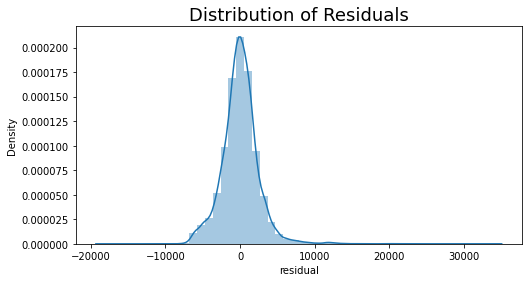

Residuals are not normally distributed


In [71]:
# Uji Normalisasi

from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(nw_data['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(nw_data['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

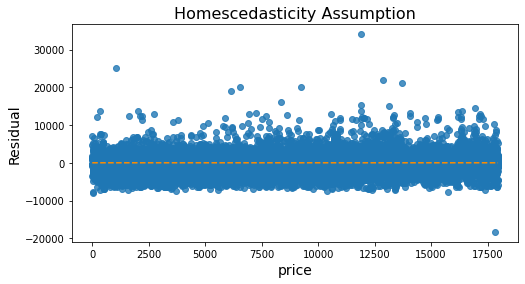

In [72]:
# HOMOSKEDASTISITAS

# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=nw_data.index, y=nw_data.residual, alpha=0.8)
plt.plot(np.repeat(0, len(nw_data.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('price', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

In [73]:
plt.style.use("ggplot")

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = nw_data[['model','year','mileage','tax','mpg','engineSize']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
  
print(vif_data)

      feature        VIF
0       model   4.738019
1        year  83.776454
2     mileage   2.839159
3         tax   6.285650
4         mpg  47.522857
5  engineSize  16.069283


In [76]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
vf = ['model','year','mileage','tax','mpg','engineSize']

lm = smf.ols(formula = "price~ model+year+mileage+tax+mpg+engineSize", data = nw_data).fit()
y,X = dmatrices ("price~ model+year+mileage+tax+mpg+engineSize", data = nw_data, return_type ="dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vf = pd.DataFrame(vif)

# Tambahan

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

def mark_predict(th,mil,tx,pg,engine):
    # import data
    data = pd.read_csv("https://raw.githubusercontent.com/Faiqazmi/Dataset_latihan/main/ford.csv")


    # encoder data
    encode = preprocessing.LabelEncoder()

    encode.fit(data.transmission.drop_duplicates())
    data.transmission = encode.transform(data.transmission)

    encode.fit(data.fuelType.drop_duplicates())
    data.fuelType = encode.transform(data.fuelType)

    encode.fit(data.model.drop_duplicates())
    data.model = encode.transform(data.model)

    #Dropping data
    data.drop(columns=['fuelType','transmission'], inplace=True)

    #Pengurutan data
    nw_data = data[['model','year','mileage','tax','mpg','engineSize','price']]


    #feature and label selection
    x = nw_data.iloc[:, 1:6].values
    y = nw_data.iloc[:, -1].values

    #Split data --> Train and split

  
    #Building model Linear regression
    lr = LinearRegression()
    lr.fit(x, y)

    #Predict
    X_test = np.array([th,mil,tx,pg,engine])
    X_test = X_test.reshape((1,-1))
    hasil = lr.predict(X_test)[0]


    return round(hasil)

mark_predict(2012,1546,140,40,2)


12575